In [15]:
import numpy as np
import matplotlib.pyplot as pl
import qnm_filter
from scipy.stats import multivariate_normal
from scipy.stats import chi2

In [2]:
pi = np.pi

In [3]:
def normal_2d(x, mean, cov):
    temp0 = (2*pi)**(-1)*np.linalg.det(cov)**(-1/2)
    temp1 = np.exp(-0.5*(x-mean).T@np.linalg.inv(cov)@(x-mean))
    return temp0*temp1

In [67]:
mass_space = np.linspace(-5,5,int(1e3))
chi_space = np.linspace(-5,5,int(1e3))

mass_grid, chi_grid = np.meshgrid(mass_space, chi_space)
total_grid = np.dstack((mass_grid, chi_grid))

In [68]:
var = multivariate_normal(mean=[0,0], cov=[[1,0],[0,1]])
pdf = var.pdf(total_grid)
ln_pdf = np.log(pdf)

In [69]:
grid_side = mass_space[1] - mass_space[0]
print("Is the pdf normalised: %r" % np.isclose(np.sum(pdf*grid_side**2),1))

Is the pdf normalised: True


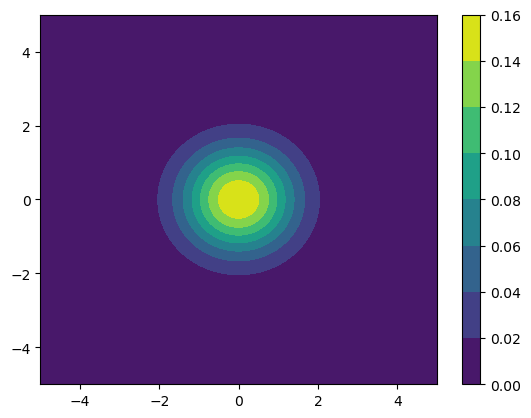

In [70]:
pl.contourf(mass_grid, chi_grid, pdf)
pl.colorbar()

In [32]:
temp_space = np.linspace(0, 2, int(1e3))
chi2_cdf = chi2.cdf(temp_space, 2)
quantile = temp_space[np.argmin(np.abs(chi2_cdf - 0.5))]

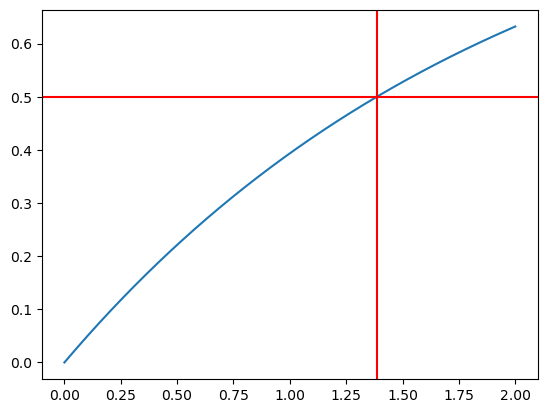

In [31]:
pl.plot(temp_space, chi2_cdf)
pl.axvline(quantile, c='r')
pl.axhline(0.5, c = 'r')

In [39]:
temp1_space = np.linspace(0, 5, int(1e3))
test_space = np.dstack((np.full(int(1e3), 0), temp1_space))

In [51]:
mean = [0,0]
cov = [[1,0],[0,1]]
distribution = [(i - mean).T@cov@(i-mean) for i in test_space.reshape(-1, test_space.shape[-1])]

In [54]:
axis_value = temp1_space[np.argmin(np.abs(distribution - quantile))]

In [56]:
pdf_value = var.pdf([0,axis_value])
print(np.sum(pdf[pdf>pdf_value])/np.sum(pdf))

0.4990691747909702


In [11]:
thresh_analytic = np.log(var.pdf([1,0]))

In [63]:
qnm_filter.find_credible_region(ln_pdf, num_cpu=9, target_probability=0.5)

/home/neil/anaconda3/envs/ringdown/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:178: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)


array([-2.53150429])

In [65]:
np.log(pdf_value)

-2.5295722651115513